# DECISION TREE

## IMPORT LIBRARIES

In [263]:
import pandas as pa
import matplotlib.pyplot as map
import seaborn as sea
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn import tree

## Task-1. Data Preparation:

In [156]:
data=pa.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


## Task-2. Exploratory Data Analysis (EDA):

In [159]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [163]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [165]:
#Handilng null values
data['oldpeak']=data['oldpeak'].fillna(data['oldpeak'].mean())

In [167]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,fixed defect,4


In [169]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

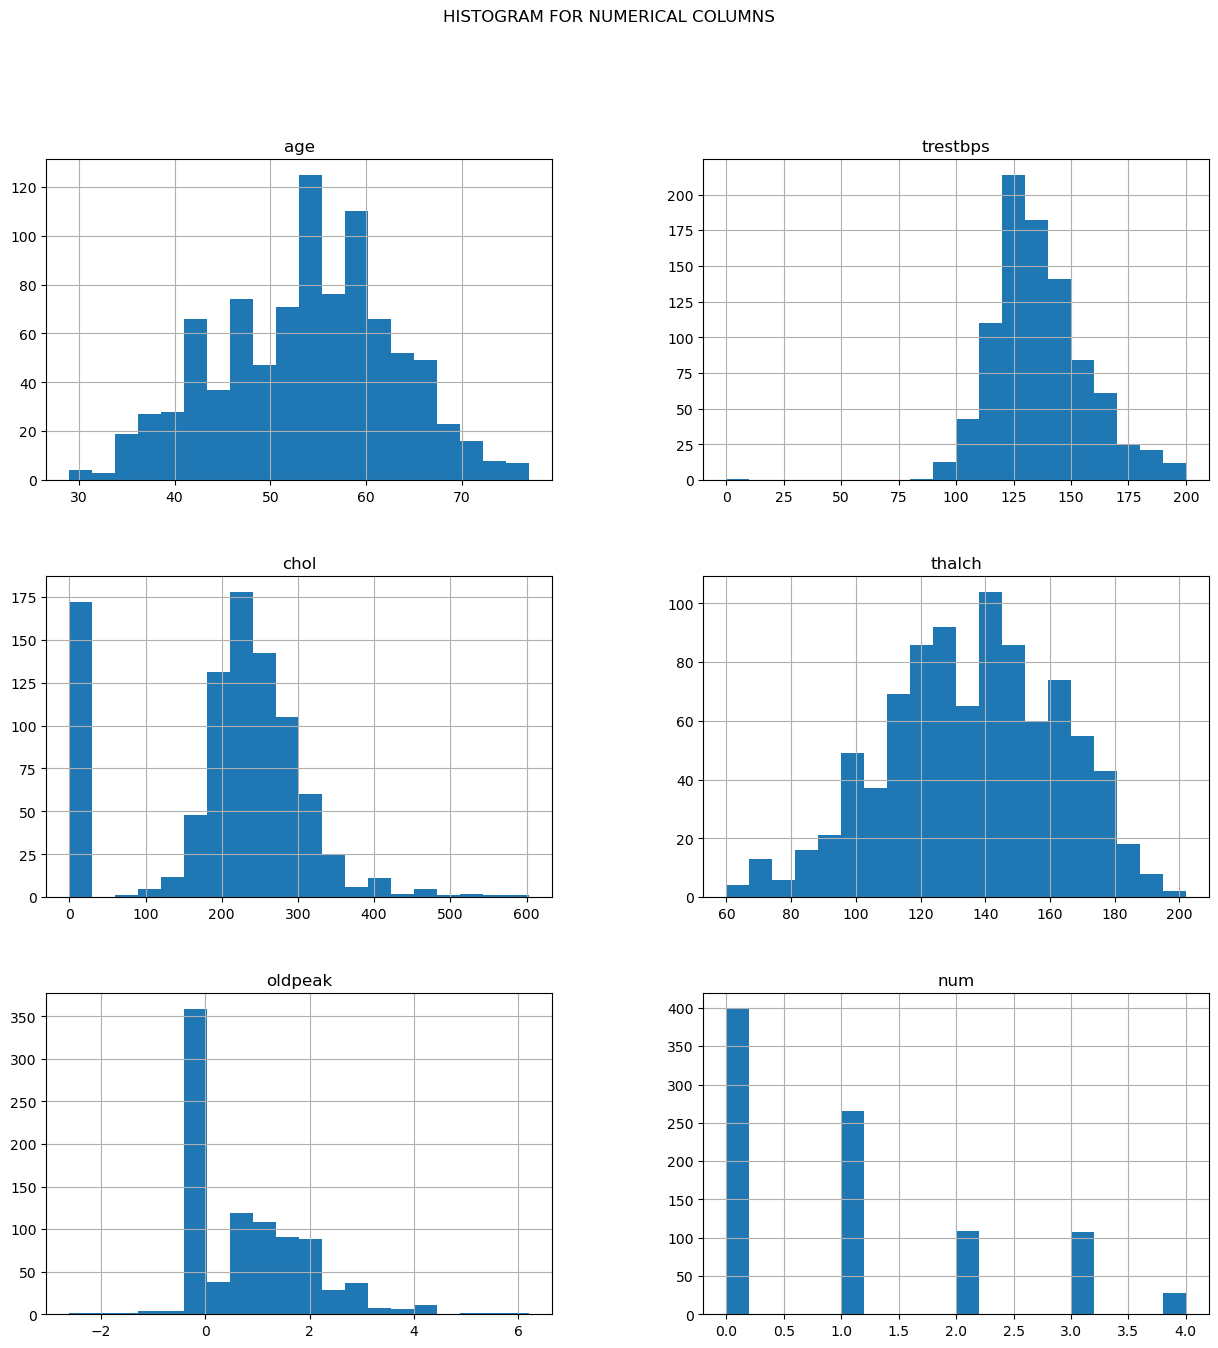

In [171]:
data.hist(bins=20,figsize=(15,15))
map.suptitle('HISTOGRAM FOR NUMERICAL COLUMNS')
map.show()

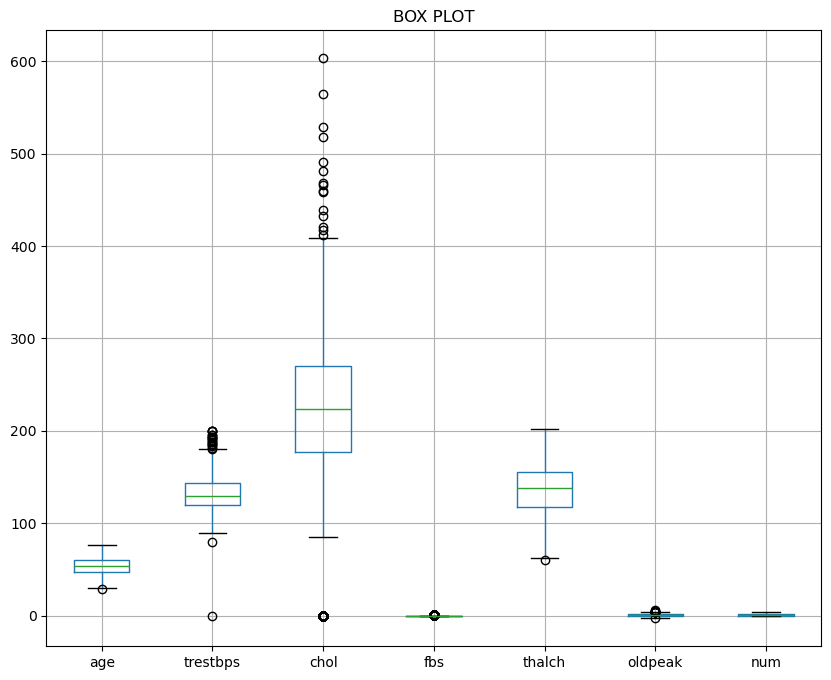

In [172]:
map.figure(figsize=(10,8))
data.boxplot()
map.title('BOX PLOT')
map.show()

## Task-3. Feature Engineering:

In [174]:
#Converting bool type data into int
bool_type=data.select_dtypes(include='bool').columns

for col in bool_type:
    data[col]=data[col].astype('int')

In [178]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs           int32
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [180]:
#converting objects into string
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype(str)

In [182]:
#ENCODING CATOGERICAL FEATURES USING LABEL ENCODER
cat_type=data.select_dtypes(include='object').columns

label=LabelEncoder()

for col in cat_type:
    data[col]=label.fit_transform(data[col])

In [184]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,1,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,1,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,1,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,3,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.500000,2,2,4
904,62,1,0,166,170,0,2,120,3,3.000000,1,2,4
905,56,1,2,170,0,0,0,123,3,2.500000,0,1,4
906,56,1,2,144,208,1,2,105,2,0.891253,0,0,4


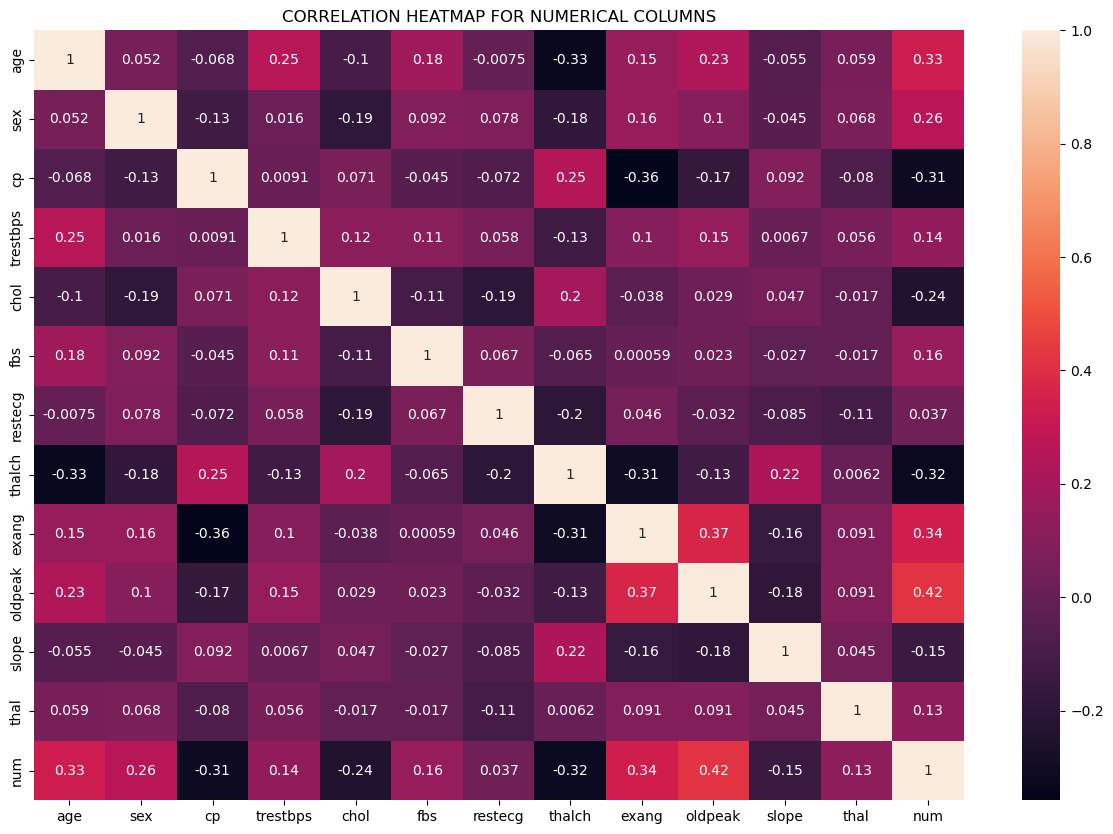

In [186]:
map.figure(figsize=(15,10))
sea.heatmap(data.corr(),annot=True)
map.title('CORRELATION HEATMAP FOR NUMERICAL COLUMNS')
map.show()

## Task-4.Decision Tree Classification:

In [189]:
x=data.drop('num',axis=1)
y=data['num']

In [191]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,1,2.300000,0,0
1,41,1,1,135,203,0,1,132,1,0.000000,1,0
2,57,1,0,140,192,0,1,148,1,0.400000,1,0
3,52,1,3,118,186,0,0,190,1,0.000000,1,0
4,57,1,0,110,201,0,1,126,3,1.500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.500000,2,2
904,62,1,0,166,170,0,2,120,3,3.000000,1,2
905,56,1,2,170,0,0,0,123,3,2.500000,0,1
906,56,1,2,144,208,1,2,105,2,0.891253,0,0


In [193]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [195]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [329]:
decision_model=DecisionTreeClassifier(max_depth=3)
decision_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [331]:
y_pred=decision_model.predict(x_test)

In [341]:
pa.Series(y_pred).value_counts()

0    107
1     56
3     19
Name: count, dtype: int64

In [343]:
pa.crosstab(y_test,y_pred)

col_0,0,1,3
num,,,
0,76,10,3
1,19,24,5
2,5,12,5
3,5,8,4
4,2,2,2


In [238]:
acuraccy=accuracy_score(y_test,y_pred)
print('ACCURACY:',acuraccy)

ACCURACY: 0.5054945054945055


In [240]:
warnings.simplefilter('ignore')
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73        89
           1       0.37      0.35      0.36        48
           2       0.32      0.32      0.32        22
           3       0.06      0.06      0.06        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.29      0.30      0.29       182
weighted avg       0.49      0.51      0.50       182



## Task-5. Hyperparameter Tuning:

In [249]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Grid search
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 20}


In [317]:
decision_model1 = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=20)
decision_model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=20)

In [319]:
y_pred1=decision_model1.predict(x_test)

In [349]:
pa.Series(y_pred1).value_counts()

In [353]:
pa.crosstab(y_test,y_pred1)

col_0,0,1,2,3
num,,,,
0,71,13,5,0
1,22,17,5,4
2,2,14,3,3
3,7,7,3,0
4,1,1,3,1


In [337]:
warnings.simplefilter('ignore')
acuraccy=accuracy_score(y_test,y_pred1)
print('ACCURACY:',acuraccy)
print("\nClassification Report:\n", classification_report(y_test, y_pred1))

ACCURACY: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74        89
           1       0.33      0.35      0.34        48
           2       0.16      0.14      0.15        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.50       182
   macro avg       0.23      0.26      0.25       182
weighted avg       0.44      0.50      0.47       182



## Task-6. Model Evaluation and Analysis:

In [360]:
#DECISION TREE WITH RANDOM VALUES
map.figure(dpi=2000)
tree.plot_tree(decision_model);

In [356]:
#DECISION TREE WITH BEST VALUES
map.figure(dpi=2000)
tree.plot_tree(decision_model1);

## Interview Questions:

#### 1. Common Decision Tree Hyperparameters:
##### max_depth: Limits tree depth; prevents overfitting by restricting complexity.
##### min_samples_split: Minimum samples to split a node; higher values prevent small splits, reducing overfitting.
##### min_samples_leaf: Minimum samples per leaf; larger leaves reduce overfitting.
##### criterion: Split quality metric (e.g., gini, entropy); affects purity of nodes.
##### max_features: Limits features considered per split; helps prevent overfitting and speeds up training.

##### 2. Label Encoding vs. One-Hot Encoding:
##### Label Encoding: Assigns each category a unique integer. Best for ordinal data with an inherent order.
##### One-Hot Encoding: Creates binary columns for each category, suited for nominal (unordered) data.